In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/ford.csv")
df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [5]:
import plotly.express as px

In [6]:
import plotly.express as px
fig = px.bar(df, x="model", y="price", color="model")
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()


In [7]:
import plotly.express as px
fig = px.bar(df, x="fuelType", y="price", color="fuelType")
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()


In [8]:
df.corr()['price']

<ipython-input-8-cbe57b8e6d9c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



year          0.636009
price         1.000000
mileage      -0.530659
tax           0.406857
mpg          -0.346419
engineSize    0.411178
Name: price, dtype: float64

In [9]:
df.drop(columns = "mileage" , inplace = True)
df.drop(columns = "mpg" , inplace = True)

In [10]:
df

,model,year,price,transmission,fuelType,tax,engineSize
0,Fiesta,2017,12000,Automatic,Petrol,150,1.0
1,Focus,2018,14000,Manual,Petrol,150,1.0
2,Focus,2017,13000,Manual,Petrol,150,1.0
3,Fiesta,2019,17500,Manual,Petrol,145,1.5
4,Fiesta,2019,16500,Automatic,Petrol,145,1.0
...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,Petrol,150,1.4
17962,B-MAX,2014,7499,Manual,Petrol,30,1.0
17963,Focus,2015,9999,Manual,Diesel,20,1.6
17964,KA,2018,8299,Manual,Petrol,145,1.2


In [11]:
df['fuelType'].value_counts()

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [12]:
def fueltype_Labels (n):
  if n == 'Petrol':
    return 0
  elif n == 'Diesel':
    return 1
  elif n == 'Hybrid':
    return 2
  elif n == 'Electric':
    return 3
  elif n == 'Other':
    return 4

In [13]:
df["fuelType_int"] = df['fuelType'].apply(fueltype_Labels).astype(int)

In [14]:
df.head()

,model,year,price,transmission,fuelType,tax,engineSize,fuelType_int
0,Fiesta,2017,12000,Automatic,Petrol,150,1.0,0
1,Focus,2018,14000,Manual,Petrol,150,1.0,0
2,Focus,2017,13000,Manual,Petrol,150,1.0,0
3,Fiesta,2019,17500,Manual,Petrol,145,1.5,0
4,Fiesta,2019,16500,Automatic,Petrol,145,1.0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   fuelType      17966 non-null  object 
 5   tax           17966 non-null  int64  
 6   engineSize    17966 non-null  float64
 7   fuelType_int  17966 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 1.1+ MB


In [16]:
df.drop(columns = "fuelType" , inplace = True)

In [17]:
df["transmission"].value_counts()

Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

In [18]:
def transmission_Labels (n):
  if n == 'Manual':
    return 0
  elif n == 'Automatic':
    return 1
  elif n == 'Semi-Auto':
    return 2

In [19]:
df["transmission"] = df["transmission"].apply(transmission_Labels).astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  int64  
 4   tax           17966 non-null  int64  
 5   engineSize    17966 non-null  float64
 6   fuelType_int  17966 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 982.6+ KB


<ipython-input-21-af686bab0934>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

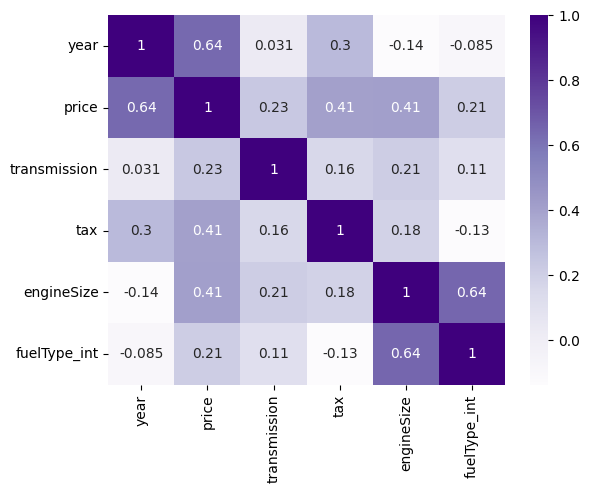

In [21]:
sns.heatmap(df.corr() , annot = True , cmap = "Purples")

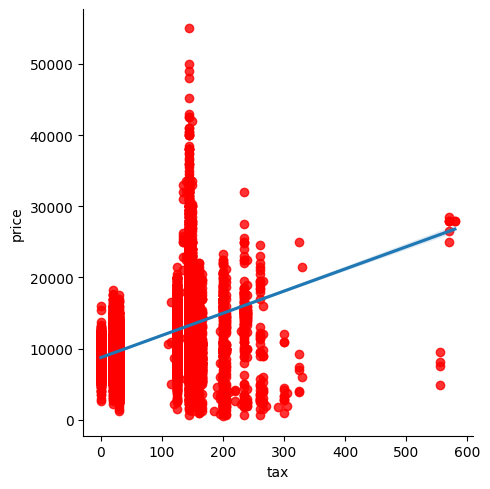

In [22]:
sns.lmplot(x = 'tax' , y = 'price' , data=df , scatter_kws={'color': 'red'})

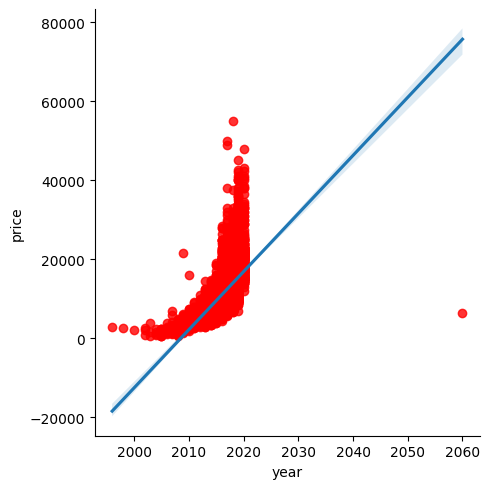

In [23]:
sns.lmplot(x = 'year' , y = 'price' , data=df , scatter_kws={'color': 'red'})

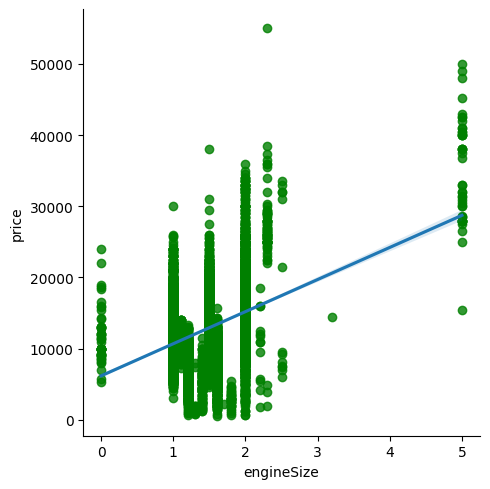

In [25]:
sns.lmplot(x = 'engineSize' , y = 'price' , data=df , scatter_kws={'color': 'green'})

In [27]:
from sklearn.linear_model import LinearRegression

In [32]:
x = df[['tax']]
y = df[['price']]
model = LinearRegression()
model.fit(x,y)

r_squared = model.score(x,y)
print(f"R-Squared:  {r_squared} ")
n = len(y)
k = x.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
print(f"Adjusted R-Squared: {adjusted_r_squared}")

R-Squared:  0.1655328773504796 
Adjusted R-Squared: 0.16548642516151002


In [33]:
x = df[['engineSize']]
y = df[['price']]
model = LinearRegression()
model.fit(x,y)

r_squared = model.score(x,y)
print(f"R-Squared:  {r_squared} ")
n = len(y)
k = x.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
print(f"Adjusted R-Squared: {adjusted_r_squared}")

R-Squared:  0.16906741998593766 
Adjusted R-Squared: 0.16902116455396188


In [34]:
x = df[['year']]
y = df[['price']]
model = LinearRegression()
model.fit(x,y)

r_squared = model.score(x,y)
print(f"R-Squared:  {r_squared} ")
n = len(y)
k = x.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
print(f"Adjusted R-Squared: {adjusted_r_squared}")

R-Squared:  0.4045078811363496 
Adjusted R-Squared: 0.4044747319424695


In [43]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error

label_encoder = preprocessing.LabelEncoder()
df['model']= label_encoder.fit_transform(df['model'])


X = df[['model', 'year','transmission' , 'fuelType_int', 'tax', 'engineSize']]
Y = df[['price']]
X.head()
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)
print('x_train:', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train:', y_train.shape)
print('y_test: ', y_test.shape)

clf = LinearRegression()
clf.fit(x_train,y_train)

LinReg_pred = clf.predict(x_test)
print("predicted values in liner regression:",LinReg_pred)

print(f"Accuracy : {clf.score(x_test,y_test)}")

mse = mean_squared_error(y_test, LinReg_pred)
print("Mean Squared Error (MSE):", mse)
mae = mean_absolute_error(y_test, LinReg_pred)
print("Mean Absolute Error (MAE):", mae)

x_train: (14372, 6)
x_test:  (3594, 6)
y_train: (14372, 1)
y_test:  (3594, 1)
predicted values in liner regression: [[16187.46566337]
 [ 5410.69317834]
 [13839.69834431]
 ...
 [12093.51690773]
 [12830.39179174]
 [15762.47085676]]
Accuracy : 0.6972819292308097
Mean Squared Error (MSE): 6970234.973705969
Mean Absolute Error (MAE): 1959.7722694835866
